## script de prediccion 
Se entrenó un modelo de regresión lineal utilizando los datos de entrenamiento. Posteriormente, este modelo fue utilizado para realizar predicciones sobre el conjunto de datos de prueba. Los resultados se visualizaron mediante un gráfico de dispersión, donde los puntos azules representan los datos reales del conjunto de prueba y la línea roja representa las predicciones generadas por el modelo de regresión.

Modelo básico:
MAE: 167568.97330750996
RMSE: 244426.1564184759
R²: 0.2934498264538914


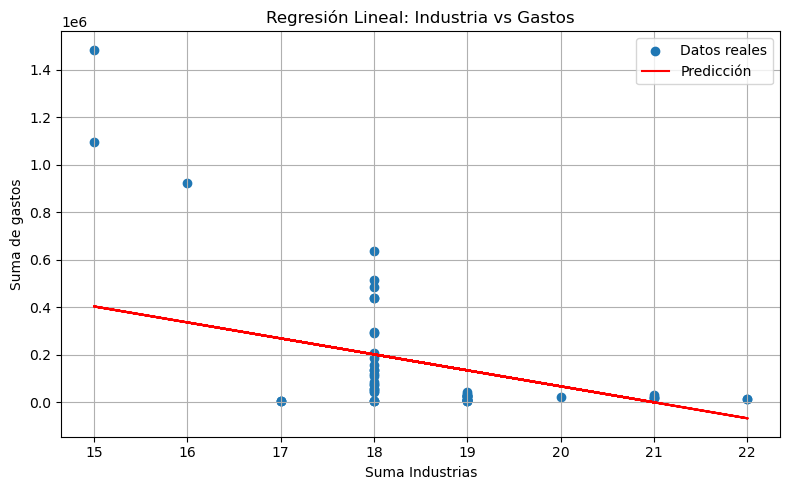


Modelo mejorado:
MAE: 161186.58230641406
RMSE: 231832.63187236636
R²: 0.3643811307718009


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar datos
establecimientos_df = pd.read_csv("Establecimientos.csv")
gastos_df = pd.read_csv("Gastos.csv")

# Unir los dataframes por el índice
df = pd.merge(establecimientos_df, gastos_df, left_on="Indice", right_on="indice")

# --- Modelo 1: Usando solo 'Suma Industrias' ---
X = df[["Suma Industrias"]]
y = df["Suma de gastos"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print("Modelo básico:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("Suma Industrias")
plt.ylabel("Suma de gastos")
plt.title("Regresión Lineal: Industria vs Gastos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Modelo 2: Usando industrias específicas + suma ---
X_full = df[["Plásticas", "Textiles", "Pesqueras",]]
y_full = df["Suma de gastos"]

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

modelo_full = LinearRegression()
modelo_full.fit(X_train_full, y_train_full)
y_pred_full = modelo_full.predict(X_test_full)

print("\nModelo mejorado:")
print("MAE:", mean_absolute_error(y_test_full, y_pred_full))
print("RMSE:", np.sqrt(mean_squared_error(y_test_full, y_pred_full)))
print("R²:", r2_score(y_test_full, y_pred_full))

# MODELO POR TIPO DE INDUSTRIA 

Modelos de predicción de gastos por cada industria específica:

--- Modelo para predecir ' Productos de caucho y plástico ' basado en 'Plásticas' ---
MAE: 63602.03778894244
RMSE: 96612.34186293512
R²: 0.15611187107794833

--- Modelo para predecir ' Productos textiles ' basado en 'Textiles' ---
MAE: 40423.546125089626
RMSE: 59846.07656395638
R²: 0.353377584361507

--- Modelo para predecir ' Pesca y actividades relacionadas con la pesca ' basado en 'Pesqueras' ---
MAE: 80526.94858506808
RMSE: 113258.55952474337
R²: 0.012588293269296558


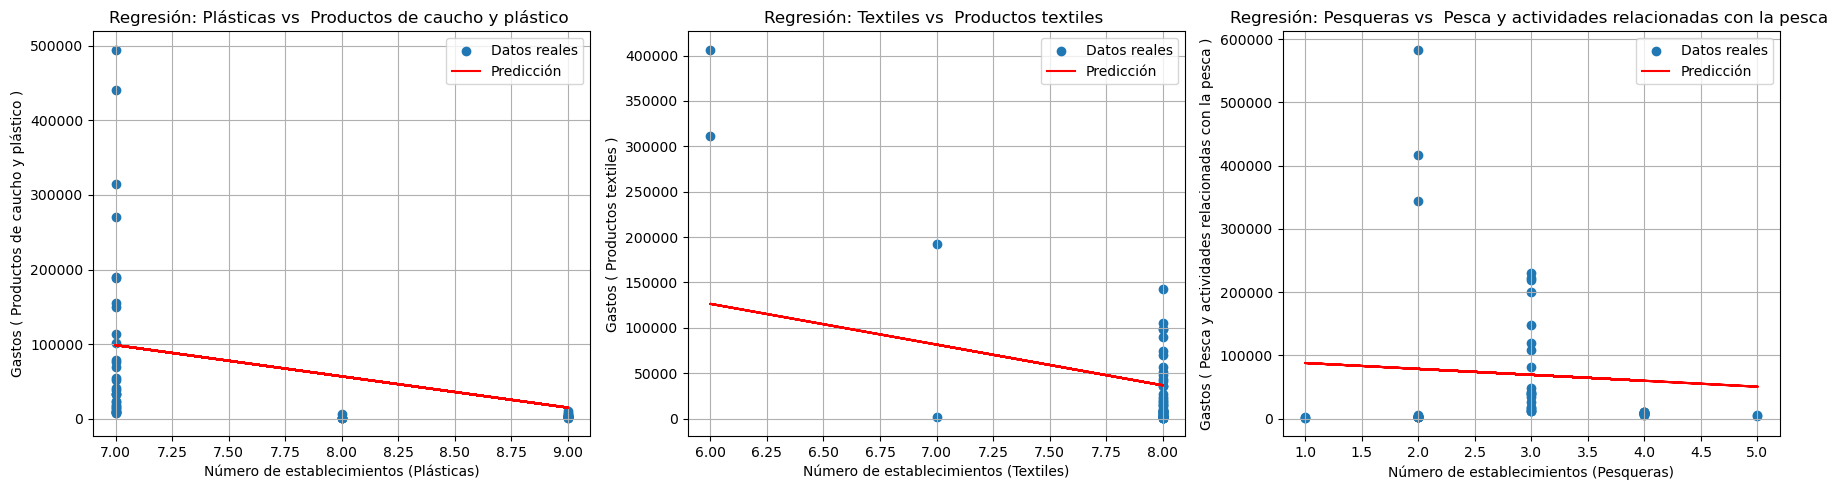

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar datos
establecimientos_df = pd.read_csv("Establecimientos.csv")
gastos_df = pd.read_csv("Gastos.csv")

# Unir los dataframes por el índice
df = pd.merge(establecimientos_df, gastos_df, left_on="Indice", right_on="indice")

# Definir el mapeo de columnas de industrias (establecimientos) a columnas de gastos
# Asegúrate de que estos nombres de columnas coincidan exactamente con tus CSVs.
industry_mapping = {
    "Plásticas": " Productos de caucho y plástico ",
    "Textiles": " Productos textiles ",
    "Pesqueras": " Pesca y actividades relacionadas con la pesca "
}

# Configurar la figura y los subplots para los gráficos
# Una fila y un número de columnas igual a la cantidad de mapeos
n_cols_plot = len(industry_mapping)
fig, axes = plt.subplots(1, n_cols_plot, figsize=(6 * n_cols_plot, 5), squeeze=False)
axes = axes.flatten() # Aplanar para facilitar la iteración

print("Modelos de predicción de gastos por cada industria específica:")

for i, (est_col, gasto_col) in enumerate(industry_mapping.items()):
    # X es la columna de establecimientos de la industria actual
    X = df[[est_col]]
    # y es la columna de gastos de la industria actual
    y = df[gasto_col]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar el modelo de regresión lineal para esta industria
    model_industry = LinearRegression()
    model_industry.fit(X_train, y_train)

    # Realizar predicciones
    y_pred_industry = model_industry.predict(X_test)

    # Calcular y mostrar las métricas de evaluación para el modelo de esta industria
    print(f"\n--- Modelo para predecir '{gasto_col}' basado en '{est_col}' ---")
    print("MAE:", mean_absolute_error(y_test, y_pred_industry))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_industry)))
    print("R²:", r2_score(y_test, y_pred_industry))

    # Graficar en el subplot correspondiente
    ax = axes[i]
    ax.scatter(X_test, y_test, label="Datos reales")
    ax.plot(X_test, y_pred_industry, color="red", label="Predicción")
    ax.set_xlabel(f"Número de establecimientos ({est_col})")
    ax.set_ylabel(f"Gastos ({gasto_col})")
    ax.set_title(f"Regresión: {est_col} vs {gasto_col}")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Opcional: Si quieres mantener el modelo de "Suma Industrias" vs "Suma de gastos" original
# para referencia, puedes añadirlo aquí.
# X_suma = df[["Suma Industrias"]]
# y_suma = df["Suma de gastos"]
# X_train_suma, X_test_suma, y_train_suma, y_test_suma = train_test_split(X_suma, y_suma, test_size=0.2, random_state=42)
# modelo_suma = LinearRegression()
# modelo_suma.fit(X_train_suma, y_train_suma)
# y_pred_suma = modelo_suma.predict(X_test_suma)
# print("\n--- Modelo original 'Suma Industrias' vs 'Suma de gastos' (referencia) ---")
# print("MAE:", mean_absolute_error(y_test_suma, y_pred_suma))
# print("RMSE:", np.sqrt(mean_squared_error(y_test_suma, y_pred_suma)))
# print("R²:", r2_score(y_test_suma, y_pred_suma))

METRICAS OBTENIDAS 


In [36]:


print("--- Score Total del Modelo Multivariable (prediciendo 'Suma de gastos') ---")
mae_full = mean_absolute_error(y_test_full, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_test_full, y_pred_full))
r2_full = r2_score(y_test_full, y_pred_full)

print("MAE Total:", mae_full)
print("RMSE Total:", rmse_full)
print("R² Total:", r2_full)


# --- Opción 2: Promedio de los scores de los modelos individuales ---
# Si te refieres a un promedio general de la efectividad de cada modelo individual de industria

industry_mapping = {
    "Plásticas": " Productos de caucho y plástico ",
    "Textiles": " Productos textiles ",
    "Pesqueras": " Pesca y actividades relacionadas con la pesca "
}

all_maes = []
all_rmses = []
all_r2s = []

print("\n--- Scores por cada modelo individual (para calcular promedios) ---")
for i, (est_col, gasto_col) in enumerate(industry_mapping.items()):
    X = df[[est_col]]
    y = df[gasto_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model_industry = LinearRegression()
    model_industry.fit(X_train, y_train)
    y_pred_industry = model_industry.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred_industry)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_industry))
    r2 = r2_score(y_test, y_pred_industry)

    all_maes.append(mae)
    all_rmses.append(rmse)
    all_r2s.append(r2)

    print(f"  Modelo para '{gasto_col}' (basado en '{est_col}'):")
    print(f"    MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

print("\n--- Promedio de Scores de los Modelos Individuales ---")
print("MAE Promedio:", np.mean(all_maes))
print("RMSE Promedio:", np.mean(all_rmses))
print("R² Promedio:", np.mean(all_r2s))

# Puedes añadir los gráficos aquí si deseas verlos, pero para el "score total" no son necesarios.
# plt.

--- Score Total del Modelo Multivariable (prediciendo 'Suma de gastos') ---
MAE Total: 161186.58230641406
RMSE Total: 231832.63187236636
R² Total: 0.3643811307718009

--- Scores por cada modelo individual (para calcular promedios) ---
  Modelo para ' Productos de caucho y plástico ' (basado en 'Plásticas'):
    MAE: 63602.04, RMSE: 96612.34, R²: 0.156
  Modelo para ' Productos textiles ' (basado en 'Textiles'):
    MAE: 40423.55, RMSE: 59846.08, R²: 0.353
  Modelo para ' Pesca y actividades relacionadas con la pesca ' (basado en 'Pesqueras'):
    MAE: 80526.95, RMSE: 113258.56, R²: 0.013

--- Promedio de Scores de los Modelos Individuales ---
MAE Promedio: 61517.51083303338
RMSE Promedio: 89905.65931721161
R² Promedio: 0.17402591623625063
